<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Euromillions_PatternFinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

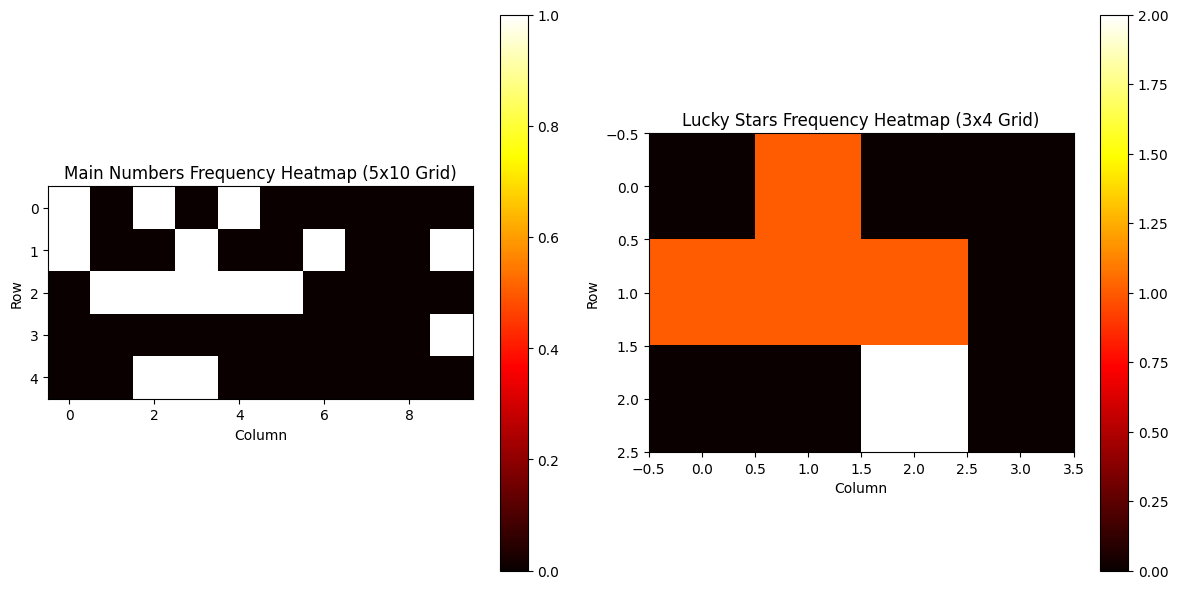

Predicted Main Numbers (Row, Column): [(2, 1), (1, 5), (1, 3), (3, 6), (3, 5)]
Predicted Lucky Stars (Row, Column): [(2, 3), (3, 3)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Define historical data
historical_draws = [
    [17, 22, 23, 24, 44, 6, 11],
    [1, 3, 11, 20, 43, 2, 11],
    [5, 14, 25, 26, 40, 5, 7],
    # Add all historical draws here...
]

# Step 2: Create frequency heatmaps for main numbers and lucky stars
main_number_frequency = np.zeros((5, 10))  # 5x10 grid for main numbers
lucky_star_frequency = np.zeros((3, 4))    # 3x4 grid for lucky stars

for draw in historical_draws:
    main_numbers, lucky_stars = draw[:5], draw[5:]

    # Update main number frequency heatmap
    for num in main_numbers:
        row, col = divmod(num - 1, 10)  # Convert number to grid coordinates
        main_number_frequency[row, col] += 1

    # Update lucky star frequency heatmap
    for star in lucky_stars:
        row, col = divmod(star - 1, 4)  # Convert star to grid coordinates
        lucky_star_frequency[row, col] += 1

# Step 3: Visualize heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Main numbers heatmap
im1 = axes[0].imshow(main_number_frequency, cmap='hot', interpolation='nearest')
axes[0].set_title("Main Numbers Frequency Heatmap (5x10 Grid)")
axes[0].set_xlabel("Column")
axes[0].set_ylabel("Row")
fig.colorbar(im1, ax=axes[0])

# Lucky stars heatmap
im2 = axes[1].imshow(lucky_star_frequency, cmap='hot', interpolation='nearest')
axes[1].set_title("Lucky Stars Frequency Heatmap (3x4 Grid)")
axes[1].set_xlabel("Column")
axes[1].set_ylabel("Row")
fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

# Step 4: Identify hotspots and predict numbers
def predict_numbers(frequency_map, grid_shape, top_n):
    flat_map = frequency_map.flatten()
    indices = np.argsort(flat_map)[-top_n:]  # Get indices of top N frequencies
    predictions = [(i // grid_shape[1] + 1, i % grid_shape[1] + 1) for i in indices]
    return predictions

# Predict main numbers
main_predictions = predict_numbers(main_number_frequency, (5, 10), 5)
print("Predicted Main Numbers (Row, Column):", main_predictions)

# Predict lucky stars
star_predictions = predict_numbers(lucky_star_frequency, (3, 4), 2)
print("Predicted Lucky Stars (Row, Column):", star_predictions)